In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay



In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Caricamento del dataset CIFAR-10
cifar10 = fetch_openml('cifar_10', version=1, as_frame=False)
X = cifar10.data.astype('float32')
y = cifar10.target.astype('int')

# Sottocampionamento
X_sub, _, y_sub, _ = train_test_split(
    X, y,
    train_size=10000, stratify=y, random_state=42
)

# Divisione in train e test (ad esempio 80% train, 20% test)
x_train_sub, x_test_sub, y_train_sub, y_test_sub = train_test_split(
    X_sub, y_sub,
    train_size=0.8, stratify=y_sub, random_state=42
)

# 5. Stampa forme finali
print("x_train_sub:", x_train_sub.shape)
print("y_train_sub:", y_train_sub.shape)
print("x_test_sub:", x_test_sub.shape)
print("y_test_sub:", y_test_sub.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


x_train_sub: (8000, 3072)
y_train_sub: (8000,)
x_test_sub: (2000, 3072)
y_test_sub: (2000,)


In [3]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(x_train_sub)
X_test_scaled = scaler.transform(x_test_sub)

print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)

X_train_scaled: (8000, 3072)
X_test_scaled: (2000, 3072)


In [4]:
from sklearn.decomposition import PCA

n_components=0.95 #mantengo il 95% della varianza
pca = PCA(n_components)

#pca = PCA(n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Dati del train dopo la PCA:", X_train_pca.shape)
print("Dati del test dopo la PCA:", X_test_pca.shape)

Dati del train dopo la PCA: (8000, 212)
Dati del test dopo la PCA: (2000, 212)


Allenamento e ricerca dei parametri ottimali per LogisticRegression:
I migliori parametri ottenuti per il LogisticRegression sono:

  - Migliori parametri: {'C': 0.01, 'max_iter': 500, 'solver': 'liblinear'}
  - Miglior Cross-Validation Accuracy: 0.3647
----------------------------------------------------------------------
Allenamento e ricerca dei parametri ottimali per SVM:
I migliori parametri ottenuti per il SVM sono:

  - Migliori parametri: {'C': 1.0, 'kernel': 'rbf'}
  - Miglior Cross-Validation Accuracy: 0.4440
----------------------------------------------------------------------
Allenamento e ricerca dei parametri ottimali per KNN:
I migliori parametri ottenuti per il KNN sono:

  - Migliori parametri: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
  - Miglior Cross-Validation Accuracy: 0.3054
----------------------------------------------------------------------
Allenamento e ricerca dei parametri ottimali per DecisionTree:
I migliori parametri ottenuti per

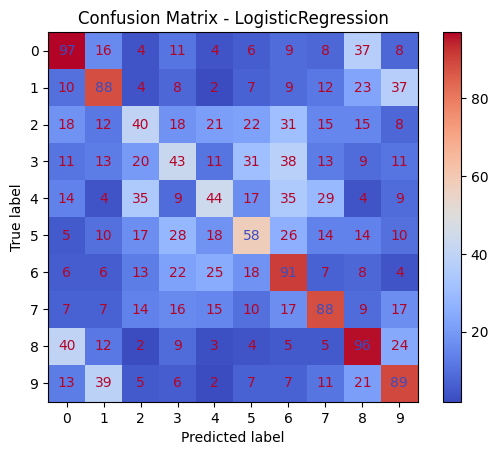


Confusion Matrix per SVM:

Precision: 0.441708
Recall: 0.446500
F1: 0.442471
----------------------------------------------------------------------
[[115  14  14   5   5   4   3   6  28   6]
 [  7 109   5   6   4   5   3   7  17  37]
 [ 18   8  45  15  30  19  41  14   8   2]
 [  2   7  18  61  13  39  29  17   4  10]
 [ 15   3  28  11  71  10  37  12   8   5]
 [  6   5  24  35  17  63  21  15   8   6]
 [  6   3  22  18  22  12 104   4   2   7]
 [  8  10   5  18  26  16  14  88   3  12]
 [ 29  12   6  11   5   3   0   1 118  15]
 [ 12  34   0   6   0   9   6   6   8 119]]


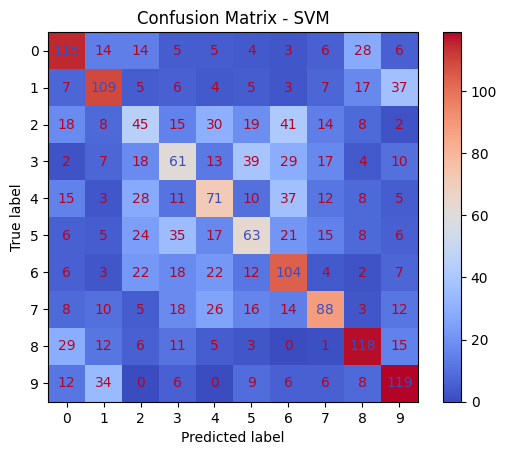


Confusion Matrix per KNN:

Precision: 0.376888
Recall: 0.304000
F1: 0.286869
----------------------------------------------------------------------
[[ 97   1  22   2  18   6   9   1  44   0]
 [ 17  23  12   3  41   9  20   4  66   5]
 [ 18   2  74   5  49   8  25   5  12   2]
 [  8   1  37  22  47  29  34  10  11   1]
 [ 13   0  40   5  90  10  18   8  16   0]
 [  4   3  37  17  48  42  33   7   8   1]
 [  5   0  51   4  59   8  66   4   3   0]
 [ 12   2  28   6  69  10  20  40  11   2]
 [ 39   1  10   2  12   6   3   0 125   2]
 [ 23   9  12   7  30   9  21   7  53  29]]


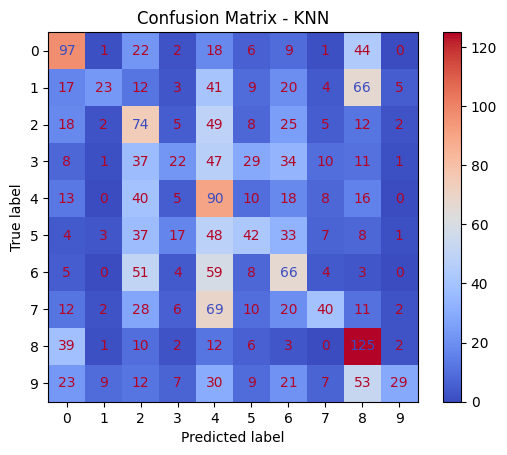


Confusion Matrix per DecisionTree:

Precision: 0.230177
Recall: 0.246500
F1: 0.226262
----------------------------------------------------------------------
[[77 10 10  0  6 10  9 17 49 12]
 [ 8 30  1  0 20 15 17  8 55 46]
 [27  5 39  3 18 13 59  9 18  9]
 [16  5 13  1 22 33 60 17 15 18]
 [11  3 46  9 23 12 60  7 17 12]
 [13  7  8  6 12 50 60  9 22 13]
 [10  6 28  1 12 25 82  8 13 15]
 [ 9  6 23  1 20 17 61 29 16 18]
 [36  9  0  1  5  7 11  8 97 26]
 [15 17  2  3  4 14 19 27 34 65]]


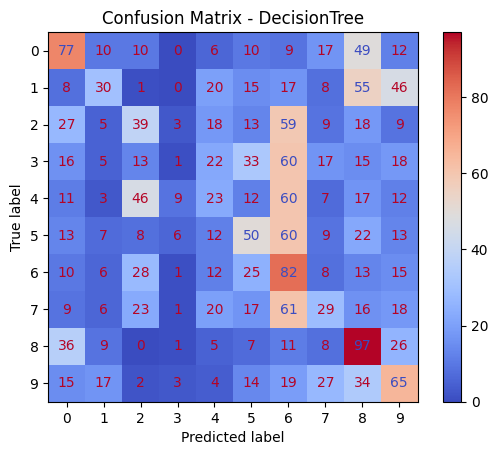


Miglior modello: SVM
Accuratezza su test: 0.4465


In [5]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier()
}

param_grids = {
    'LogisticRegression': {
        'max_iter': [500, 1000, 2000],
        'C': [0.01, 0.1, 1.0, 10],
        'solver': ['liblinear']
    },
    'SVM': {
        #'C': [0.1, 1.0],  # Ridotto per evitare una ricerca troppo lunga
        'C': [0.01, 0.1, 1.0, 10],
        'kernel': ['linear', 'poly', 'rbf']
       # 'kernel': ['linear']  # Solo kernel lineare per velocizzare
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan'] #anche quella con il coseno
    },
    'DecisionTree': {
        'max_depth': [3, 4, 5, 6, 7, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['entropy']
    }
}


best_models = {}
best_scores = {}
best_params = {}

for model_name in models.keys():
    print(f"Allenamento e ricerca dei parametri ottimali per {model_name}:")

    model = models[model_name]
    grid_param = param_grids[model_name]

    grid = GridSearchCV(model, grid_param, cv=3, scoring='accuracy',  n_jobs=-1)
    grid.fit(X_train_pca,y_train_sub)

    #salvo il miglior modello, i migliori parametri e score
    best_models[model_name] = grid.best_estimator_
    best_scores[model_name] = grid.best_score_
    best_params[model_name] = grid.best_params_

    #stampa dei migliori parametri:
    print(f"I migliori parametri ottenuti per il {model_name} sono:\n")
    print(f"  - Migliori parametri: {best_params[model_name]}")
    print(f"  - Miglior Cross-Validation Accuracy: {best_scores[model_name]:.4f}")
    print("-" * 70)

# trova il modello col punteggio migliore
best_model_name = max(best_scores, key=best_scores.get)
#attraverso il parametro key viene tornata la chiave (ossia il nome) del modello con il miglior score
best_model = best_models[best_model_name]  #mi salvo il rispettivo modello

# test Accuracy
test_prediction = best_model.predict(X_test_pca)
test_accuracy = accuracy_score(y_test_sub, test_prediction)



# confusion matrix per ogni miglior modello
for model_name, model in best_models.items():
    print(f"\nConfusion Matrix per {model_name}:\n")

    # predizione sul test set
    predizioni = model.predict(X_test_pca)

    #precision
    precision_test = precision_score(y_test_sub, predizioni, average='macro') #macro perchè il dataset ha 10 classi
    print(f"Precision: {precision_test:4f}")

    #recall
    recall_test = recall_score(y_test_sub, predizioni, average='macro')
    print(f"Recall: {recall_test:4f}")

    #punteggio F1
    f1_test =f1_score(y_test_sub, predizioni, average='macro')
    print(f"F1: {f1_test:4f}")
    print("-" * 70)

    # creazione della matrice di confusione
    cm = confusion_matrix(y_test_sub, predizioni)
    print(cm)

    # Visualizzazione della matrice di confusione del miglior modello
    matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
    matrix.plot(cmap="coolwarm")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()





print(f"\nMiglior modello: {best_model_name}")
print(f"Accuratezza su test: {test_accuracy:.4f}")


